In [1]:
#!pip install altair

#install for plotly to save images
! pip install -U kaleido  

Requirement already up-to-date: kaleido in /root/venv/lib/python3.7/site-packages (0.2.1)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import altair as alt
from altair import datum
pd.set_option('max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandasql import sqldf


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# Bring in the pickled files
# if any of the pickle files cannot be reached, please update the directories
# to the download loaction of the zip then navigate to data/Races_Combined

allraces21 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/allraces_21.pkl")
allraces22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/allraces_22.pkl")

sameraces21 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_21.pkl")
sameraces22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_22.pkl")
sameraces21_22 = pd.read_pickle("/work/Milestone_I/data/Races_Combined/sameraces_21_22.pkl")
allraces21_22 = pd.concat([allraces21, allraces22], ignore_index=True)



In [4]:
#print(len(reviewdf21_22.Track.unique()))
#allraces21_22.Track.unique()

In [5]:
#Copied and pasted the FT Drivers list in case we want to use that...
FT_Drivers = ['Alex Bowman', 'Aric Almirola', 'Austin Dillon', 'Brad Keselowski', 'Bubba Wallace',
 'Chase Briscoe', 'Chase Elliott', 'Chris Buescher', 'Christopher Bell', 'Cody Ware',
 'Cole Custer', 'Daniel Suárez', 'Denny Hamlin', 'Erik Jones', 'Joey Logano', 'Justin Haley',
 'Kevin Harvick', 'Kurt Busch', 'Kyle Busch', 'Kyle Larson', 'Martin Truex Jr.', 'Michael McDowell',
 'Ricky Stenhouse Jr.', 'Ross Chastain', 'Ryan Blaney', 'Tyler Reddick', 'William Byron']

Lets do this by pass differential and not total number of passes. The pass differential might be better to look at based on driver within team.

In [6]:
FTdriver_races21 = sameraces21[sameraces21['Driver'].isin(FT_Drivers)]
FTdriver_races22 = sameraces22[sameraces22['Driver'].isin(FT_Drivers)]

DriversPerTeam21 = FTdriver_races21.groupby(['Team','Driver']).size().reset_index().rename(columns={0:'count'})
DriversPerTeam22 = FTdriver_races22.groupby(['Team','Driver']).size().reset_index().rename(columns={0:'count'})

TeamFTDrivers21_22 = pd.merge(DriversPerTeam21, DriversPerTeam22, on = ['Team','Driver'])
DriversPerTeam21_22 = TeamFTDrivers21_22.groupby(['Team'])[['Driver']].count().reset_index()

#Teams for Analysis - Only those with more than one FT driver
teamsFT_21_22 = DriversPerTeam21_22[DriversPerTeam21_22['Driver'] > 1]['Team'].tolist()
teamsFT_21_22

['Hendrick', 'JGR', 'Penske', 'RCR', 'SHR']

In [7]:
DriversPerTeam21 = FTdriver_races21.groupby(['Team','Driver']).size().reset_index().rename(columns={0:'count'})
DriversPerTeam22 = FTdriver_races22.groupby(['Team','Driver']).size().reset_index().rename(columns={0:'count'})

We now have our FT Drivers and the teams with more than one FT Driver.  We'll use both lists since if we only use the teams list we'd get moret than FT drivers and vice versa.

In [8]:
reviewdf21_22 = sameraces21_22[(sameraces21_22['Driver'].isin(FT_Drivers)) & (sameraces21_22['Team'].isin(teamsFT_21_22))]
#reviewdf21_22


In [9]:
# Just checking...
reviewdf21_22['Team'].unique()

array(['Hendrick', 'RCR', 'SHR', 'JGR', 'Penske'], dtype=object)

In [10]:
passdiff_yoy_driver = reviewdf21_22.groupby(['Season','Team','Driver'])[['Pass Differential']].mean().reset_index()


In [11]:
driver_order = passdiff_yoy_driver['Driver'].unique().tolist()
driver_order

['Alex Bowman',
 'Chase Elliott',
 'Kyle Larson',
 'William Byron',
 'Christopher Bell',
 'Denny Hamlin',
 'Kyle Busch',
 'Martin Truex Jr.',
 'Brad Keselowski',
 'Joey Logano',
 'Ryan Blaney',
 'Austin Dillon',
 'Tyler Reddick',
 'Aric Almirola',
 'Chase Briscoe',
 'Cole Custer',
 'Kevin Harvick']

In [12]:
passdiff_yoy_team = reviewdf21_22.groupby(['Season','Team'])[['Pass Differential']].mean().reset_index()
#passdiff_yoy_team

In [13]:
#teamsFT_21_22
# 2021
passdiff21 = passdiff_yoy_driver[passdiff_yoy_driver['Season'] == 2021]
passdiff22 = passdiff_yoy_driver[passdiff_yoy_driver['Season'] == 2022]

# nascar_colors = ['#000000', '#FFD93D', '#FF0F27', '#FFFFFF', '#007DC8']

# color_scale = alt.Scale(
#             domain=(passdiff21.dropna().Team.min(),
#                     0,
#                     passdiff21.dropna().Team.max()),
#             range=[nascar_colors[0], nascar_colors[len(nascar_colors) // 2], nascar_colors[-1]])

base = alt.Chart(passdiff21).encode(
    x = alt.X('Driver:N', axis= alt.Axis(title="Driver"), sort= driver_order),
    y = alt.Y('Pass Differential:Q', axis=alt.Axis(format='.2', title = 'Pass Differential'))
)

bars = base.mark_bar().encode(
    color = alt.Color('Team:N')
)

text = base.mark_text(
    align='center',
    #dx = -1,
    dy = -5
).encode(
    text=alt.Text('Pass Differential:Q', format = '.2')
)

chart21 = (bars+text).properties(height=300, width=300)

In [14]:
# 2022

base = alt.Chart(passdiff22).encode(
    x = alt.X('Driver:N', axis= alt.Axis(title="Driver"), sort= driver_order),
    y = alt.Y('Pass Differential:Q', axis=alt.Axis(format='.2', title = 'Pass Differential'))
)

bars = base.mark_bar().encode(
    color = alt.Color('Team:N')
)

text = base.mark_text(
    align='center',
    #dx = -1,
    dy = -5
).encode(
    text=alt.Text('Pass Differential:Q', format = '.2')
)

chart22 = (bars+text).properties(height=300, width=300)

In [15]:
chart21 | chart22

alt.HConcatChart(...)

In [16]:
# passdiff21 = passdiff_yoy_driver[passdiff_yoy_driver['Season'] == 2021]
# passdiff22 = passdiff_yoy_driver[passdiff_yoy_driver['Season'] == 2022]
passdiff22

,Season,Team,Driver,Pass Differential
17,2022,Hendrick,Alex Bowman,10.363636
18,2022,Hendrick,Chase Elliott,12.363636
19,2022,Hendrick,Kyle Larson,12.363636
20,2022,Hendrick,William Byron,1.000000
21,2022,JGR,Christopher Bell,7.636364
22,2022,JGR,Denny Hamlin,18.636364
23,2022,JGR,Kyle Busch,10.818182
24,2022,JGR,Martin Truex Jr.,3.200000
25,2022,Penske,Joey Logano,2.909091
26,2022,Penske,Ryan Blaney,4.636364


In [17]:
DriverList21 = passdiff21['Driver'].to_list()
PassDiffList21 = passdiff21['Pass Differential'].to_list()
TeamList21 = passdiff21['Team'].to_list()

# Could probably do some type of list comprehension of mapping but...
def makeColorList(lst):
    for i in range(len(lst)):
        if lst[i] == 'Hendrick':
            lst[i] = '#000000'

        if lst[i] == 'RCR':
            lst[i] = '#FFD93D'

        if lst[i] == 'SHR':
            lst[i] = '#FF0F27'

        if lst[i] == 'JGR':
            lst[i] = '#FFFFFF'

        if lst[i] == 'Penske':
            lst[i] = '#007DC8'
    return None

makeColorList(TeamList21)

DriverList22 = passdiff22['Driver'].to_list()
PassDiffList22 = passdiff22['Pass Differential'].to_list()
TeamList22 = passdiff22['Team'].to_list()
makeColorList(TeamList22)
passdiff21['Team'].to_list()

['Hendrick',
 'Hendrick',
 'Hendrick',
 'Hendrick',
 'JGR',
 'JGR',
 'JGR',
 'JGR',
 'Penske',
 'Penske',
 'Penske',
 'RCR',
 'RCR',
 'SHR',
 'SHR',
 'SHR',
 'SHR']

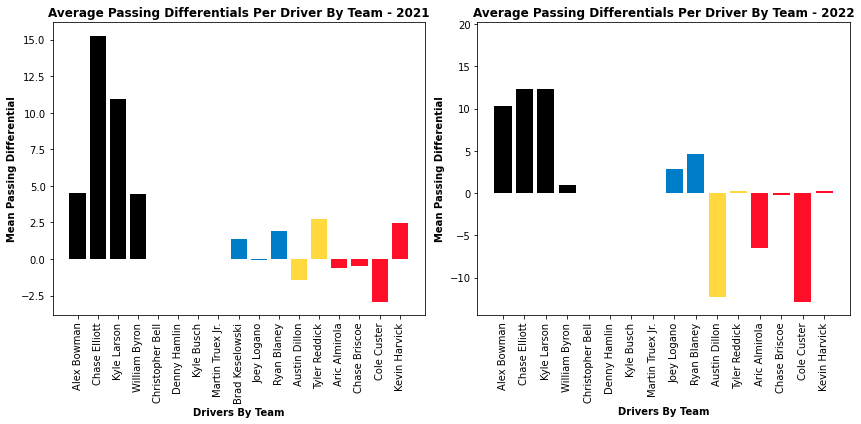

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6)) #changed the layout to side by side

plt.sca(ax1)
ax1.bar(DriverList21,PassDiffList21,color=TeamList21)
ax1.set_xlabel('Drivers By Team', fontweight='bold')
ax1.set_ylabel('Mean Passing Differential', fontweight='bold')
plt.grid(False)
#I think 90 degree rotation is a little easier to read
plt.xticks(rotation=90)
plt.title('Average Passing Differentials Per Driver By Team - 2021', fontweight='bold'#, fontsize=20
)

plt.sca(ax2)
ax2.bar(DriverList22,PassDiffList22,color=TeamList22)
ax2.set_xlabel('Drivers By Team', fontweight='bold')
ax2.set_ylabel('Mean Passing Differential', fontweight='bold')
plt.grid(False)
#I think 90 degree rotation is a little easier to read
plt.xticks(rotation=90)
plt.title('Average Passing Differentials Per Driver By Team - 2022', fontweight='bold'#, fontsize=20
)

plt.tight_layout() #added more spacing between the 2 charts
plt.show()
# plt.savefig('passdiffmean_21_22.png') # saving the chart


In [19]:
passdiff21=passdiff21.query('Driver!="Brad Keselowski"') # remove Brad for now
passdiff21=passdiff21.sort_values(by='Team')
passdiff22=passdiff22.sort_values(by='Team')

def add_color_for_team(s):
    if s=='Hendrick':
        return '#000000'
    if s=='RCR':
        return '#FFD93D'
    if s=='SHR':
        return '#FF0F27'
    if s=='JGR':
        return '#FFFFFF'
    if s=='Penske':
        return '#007DC8'

def format_title(title, subtitle=None, subtitle_font_size=14):
    """takes in titles and or subtitles and format them"""
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'
    

passdiff21['Team_Color']=passdiff21['Team'].apply(add_color_for_team)
passdiff22['Team_Color']=passdiff22['Team'].apply(add_color_for_team)


def format_title(title, subtitle=None, subtitle_font_size=14):
    """takes in titles and or subtitles and format them"""
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

colors=['#000000','#FFD93D','#FF0F27','#FFFFFF','#007DC8']
fig = make_subplots(rows=1, cols=2, subplot_titles=['2021 pass diff','2022 pass diff']
                    ,horizontal_spacing = 0.01,shared_yaxes=True)
fig.add_trace(go.Bar(x=passdiff21['Team']
                    ,y=passdiff21['Pass Differential']
                    ,marker_color=passdiff21['Team_Color']
                    )
                    ,row=1,col=1)

fig.add_trace(go.Bar(x=passdiff22['Team']
                    ,y=passdiff22['Pass Differential']
                    ,marker_color=passdiff22['Team_Color']
                    )
                    ,row=1,col=2)
fig.for_each_xaxis(lambda x: x.update(showgrid=False))
fig.for_each_yaxis(lambda x: x.update(showgrid=False))


  

fig.update_layout(plot_bgcolor='rgba(220, 239, 255, 0.8)'
                ,yaxis_title="Mean Pass Differential",showlegend=False
                ,title=format_title('Full Time Teams Pass Differential 2021 vs 2022')
                ,height = 600,width = 900,autosize = False,title_x=0.5
                )

# fig.write_image("pass_diff_teams.png") # saving image out
fig.show()


In [20]:
passdiff21=passdiff21.query('Driver!="Brad Keselowski"') # remove Brad for now
passdiff21=passdiff21.sort_values(by='Team')
passdiff22=passdiff22.sort_values(by='Team')

def add_color_for_team(s):
    if s=='Hendrick':
        return '#000000'
    if s=='RCR':
        return '#FFD93D'
    if s=='SHR':
        return '#FF0F27'
    if s=='JGR':
        return '#FFFFFF'
    if s=='Penske':
        return '#007DC8'

def format_title(title, subtitle=None, subtitle_font_size=14):
    """takes in titles and or subtitles and format them"""
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'
    

passdiff21['Team_Color']=passdiff21['Team'].apply(add_color_for_team)
passdiff22['Team_Color']=passdiff22['Team'].apply(add_color_for_team)

fig = make_subplots(rows=1, cols=2, subplot_titles=['2021 pass diff','2022 pass diff']
                    ,horizontal_spacing = 0.01,shared_yaxes=True)

fig.add_trace(go.Bar(x=passdiff21['Driver']
                    ,y=passdiff21['Pass Differential'],marker_color=passdiff21['Team_Color'])
                    ,row=1,col=1)

fig.add_trace(go.Bar(x=passdiff21['Driver']
                    ,y=passdiff22['Pass Differential'],marker_color=passdiff21['Team_Color'])
                    ,row=1,col=2)
fig.for_each_xaxis(lambda x: x.update(showgrid=False))
fig.for_each_yaxis(lambda x: x.update(showgrid=False))


  

fig.update_layout(plot_bgcolor='rgba(220, 239, 255, 0.8)'
                ,yaxis_title="Mean Passing Differential",showlegend=False
                ,title=format_title('Full Time Drivers Pass Differential 2021 vs 2022')
                ,height = 600,width = 900,autosize = False,title_x=0.5)

fig.write_image("pass_diff_drivers.png") # saving image out
fig.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ef4eb23-f38f-47e8-bfb0-51d8616b0dee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>